In [33]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import folium
from streamlit_folium import folium_static
import streamlit as st

In [34]:
df_raw = pd.read_csv('dataset/zomato.csv')

## Limpando Dados

In [35]:
# Criando Funções:

COUNTRIES = {
1: "India",
14: "Australia",
30: "Brazil",
37: "Canada",
94: "Indonesia",
148: "New Zeland",
162: "Philippines",
166: "Qatar",
184: "Singapure",
189: "South Africa",
191: "Sri Lanka",
208: "Turkey",
214: "United Arab Emirates",
215: "England",
216: "United States of America",
}

def Country_Name(country_id):
    return COUNTRIES[country_id]


# -----------------------------------------------


def create_price_tye(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"
    
    
# -----------------------------------------------

COLORS = {
"3F7E00": "darkgreen",
"5BA829": "green",
"9ACD32": "lightgreen",
"CDD614": "orange",
"FFBA00": "red",
"CBCBC8": "darkred",
"FF7800": "darkred",
}
def color_name(color_code):
    return COLORS[color_code]

# -----------------------------------------------

def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df1.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df1.columns = cols_new
    return df

In [36]:
df = df_raw.copy()

# Removendo linhas 'NaN'

df = df.dropna(subset=['Restaurant ID'])
df = df.dropna(subset=['Restaurant Name'])
df = df.dropna(subset=['Cuisines'])
df = df.dropna(subset=['Country Code'])
df = df.dropna(subset=['Address'])
df = df.dropna(subset=['Locality'])
df = df.dropna(subset=['Locality Verbose'])
df = df.dropna(subset=['Longitude'])
df = df.dropna(subset=['Average Cost for two'])
df = df.dropna(subset=['Has Table booking'])
df = df.dropna(subset=['Has Online delivery'])
df = df.dropna(subset=['Price range'])
df = df.dropna(subset=['Aggregate rating'])
df = df.dropna(subset=['Rating color'])
df = df.dropna(subset=['Votes'])
df = df.dropna(subset=['City'])


df = df.dropna( )

# Removendo linhas duplicadas
df = df.drop_duplicates()

df = df.drop(columns = ['Switch to order menu'], axis=1)

# Define categorias de preço de acordo com o range
df['Price range'] = df['Price range'].apply(create_price_tye)

# Define o padrão de cores das avaliações
df['Rating color'] = df['Rating color'].apply(color_name)

# --------------------------------------------------------

df['Country Name'] = df['Country Code'].map(Country_Name)
# Definisdo os restaurantes po apenas um tipo de culinaria
df["Cuisines"] = df.loc[:, "Cuisines"].astype(str).apply(lambda x: x.split(",")[0])



## Visão Culinárias

In [37]:
df1 = df.copy()
df1 = df1.dropna(subset=['Country Name'])

### 1. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a maior média de avaliação?

In [38]:
df1.loc[df1['Cuisines'] == 'Italian', ['Aggregate rating', 'Restaurant Name']].groupby('Restaurant Name').mean().sort_values(['Aggregate rating'],ascending = False).reset_index()

,Restaurant Name,Aggregate rating
0,Central Grocery,4.9
1,Andre's Cucina & Polenta Bar,4.9
2,The Parlor Pizzeria,4.9
3,Celino's,4.9
4,Cerroni's Purple Garlic,4.9
...,...,...
337,Le Delicatezze Di Bruno,0.0
338,Avenida Paulista,0.0
339,Più,0.0
340,Veeno,0.0


### 2. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação?

In [39]:
valor = df1.loc[df1['Cuisines'] == 'Italian', ['Aggregate rating', 'Restaurant Name']].groupby('Restaurant Name').mean().sort_values(['Aggregate rating'],ascending = True).reset_index().iloc[0,0]
print( f'Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação é {valor}' )

Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação é La Bocca Bar e Trattoria


### 3. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a maior média de avaliação?

In [40]:
df1.loc[df1['Cuisines'] == 'American', ['Aggregate rating', 'Restaurant Name']].groupby('Restaurant Name').mean().sort_values(['Aggregate rating'],ascending = False).reset_index()

,Restaurant Name,Aggregate rating
0,Hodad's,4.9
1,Brick Store Pub,4.9
2,Lankford Grocery,4.9
3,The Magnolia Pancake Haus,4.9
4,Fat Cat,4.9
...,...,...
457,Lava Lounge,3.3
458,Thunderbird Cafe,3.2
459,Bob's,2.6
460,Guy Fieri's Kitchen & Bar,2.2


### 4. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação?

In [41]:
valor = df1.loc[df1['Cuisines'] == 'American', ['Aggregate rating', 'Restaurant Name']].groupby('Restaurant Name').mean().sort_values(['Aggregate rating'],ascending = True).reset_index().iloc[0, 0 ]
print( f'Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação é {valor}' )

Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação é Alston Bar & Beef


### 5. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a maior média de avaliação?

In [42]:
df1.loc[df1['Cuisines'] == 'Arabian', ['Aggregate rating', 'Restaurant Name']].groupby('Restaurant Name').mean().sort_values(['Aggregate rating'],ascending = False).reset_index().head(5)

,Restaurant Name,Aggregate rating
0,Mandi@36,4.7
1,Wok of Fame,4.5
2,Three Kings,4.5
3,Madfoon Al Khaimah,4.5
4,Aroos Damascus,4.4


### 6. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação?

In [43]:
valor = df1.loc[df1['Cuisines'] == 'Arabian', ['Aggregate rating', 'Restaurant Name']].groupby('Restaurant Name').mean().sort_values(['Aggregate rating'],ascending = True).reset_index().iloc[0, 0]
print( f'Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação é {valor}' )

Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação é Raful


### 7. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a maior média de avaliação?

In [44]:
df1.loc[df1['Cuisines'] == 'Japanese', ['Aggregate rating', 'Restaurant Name']].groupby('Restaurant Name').mean().sort_values(['Aggregate rating'],ascending = False).reset_index()

,Restaurant Name,Aggregate rating
0,Samurai,4.9
1,Ramen Yushoken,4.9
2,WAKI Japanese BBQ Dining,4.9
3,Mendokoro Ramenba,4.9
4,Nobu Perth,4.9
...,...,...
146,Sushi Loko,2.9
147,Haná,2.7
148,Hachiko,2.5
149,Orienthai,2.4


###  8. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação?

In [45]:
valor = df1.loc[df1['Cuisines'] == 'Japanese', ['Aggregate rating', 'Restaurant Name']].groupby('Restaurant Name').mean().sort_values(['Aggregate rating'],ascending = True).reset_index().iloc[0, 0]
print( f'Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação é {valor}' )

Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação é Banzai Sushi


### 9. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a maior média de avaliação?

In [46]:
df1.loc[df1['Cuisines'] == 'Home-made', ['Aggregate rating', 'Restaurant Name']].groupby('Restaurant Name').mean().sort_values(['Aggregate rating'],ascending = False).reset_index()

,Restaurant Name,Aggregate rating
0,Kanaat Lokantası,4.0
1,GurMekan Restaurant,3.7


### Top 10 Restaurantes

In [47]:
cols = ['Restaurant ID', 'Restaurant Name', 'Country Name', 'City', 'Cuisines', 'Average Cost for two', 'Aggregate rating', 'Votes']
df1.loc[:, cols].groupby('Restaurant ID').max().sort_values(['Aggregate rating'],ascending = False).reset_index().head(10)

,Restaurant ID,Restaurant Name,Country Name,City,Cuisines,Average Cost for two,Aggregate rating,Votes
0,18793437,Gyu - Kaku Japanese BBQ,Indonesia,Jakarta,Japanese,350000,4.9,1014
1,17010857,Dalessandro's Steaks,United States of America,Philadelphia,Sandwich,25,4.9,287
2,6318506,Ooma,Philippines,Mandaluyong City,Japanese,1500,4.9,1167
3,16979203,Lotus of Siam,United States of America,Las Vegas,Asian,25,4.9,625
4,16979446,Mon Ami Gabi,United States of America,Las Vegas,Breakfast,70,4.9,1235
5,7600213,Oink,England,Edinburgh,British,15,4.9,96
6,16985649,Cafe Muse,United States of America,Detroit,American,25,4.9,249
7,18598596,AB's - Absolute Barbecues,India,Chennai,BBQ,1400,4.9,2080
8,16988363,Lafayette Coney Island,United States of America,Detroit,American,10,4.9,429
9,16989399,Noble Fish,United States of America,Detroit,Japanese,10,4.9,288


### 10. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação?

In [48]:
valor = df1.loc[df1['Cuisines'] == 'Home-made', ['Aggregate rating', 'Restaurant Name']].groupby('Restaurant Name').mean().sort_values(['Aggregate rating'],ascending = True).reset_index().iloc[0, 0]
print( f'Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação é {valor}' )

Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação é GurMekan Restaurant


### 11. Qual o tipo de culinária que possui o maior valor médio de um prato para duas pessoas?

In [49]:
valor = df1.loc[:, ['Average Cost for two', 'Cuisines']].groupby('Cuisines').mean().sort_values(['Average Cost for two'],ascending = False).reset_index().iloc[0, 0]
print( f'O tipo de culinária que possui o maior valor médio de um prato para duas pessoas é {valor}' )

O tipo de culinária que possui o maior valor médio de um prato para duas pessoas é Modern Australian


### 12. Qual o tipo de culinária que possui a maior nota média?

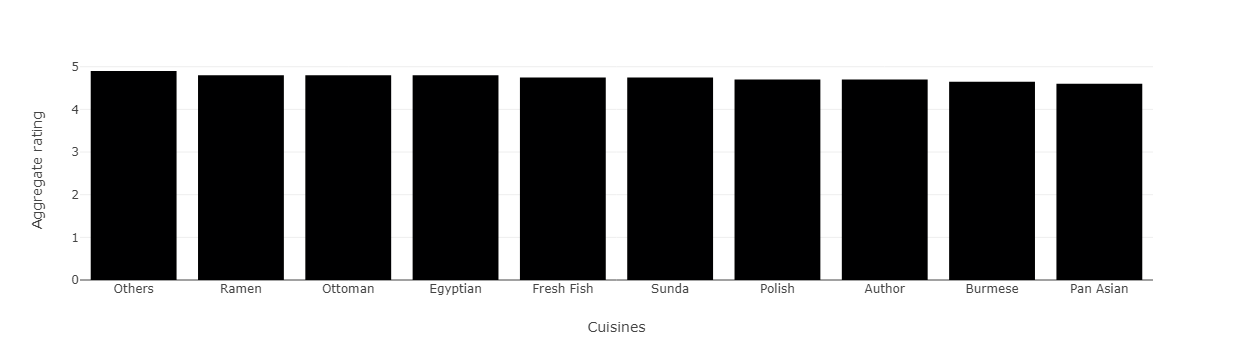

In [50]:
df2 = df1.loc[:, ['Aggregate rating', 'Cuisines']].groupby('Cuisines').mean().sort_values(['Aggregate rating'],ascending = False).reset_index()[0:10]
px.bar(df2, x = 'Cuisines', y = 'Aggregate rating')

### 13. Qual o tipo de culinária que possui a menor nota média?

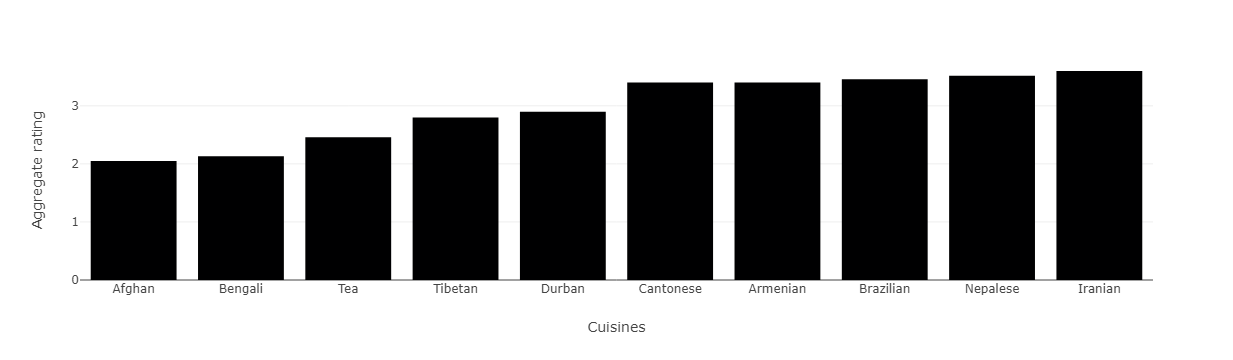

In [51]:
df2 = df1.loc[:, ['Aggregate rating', 'Cuisines']].groupby('Cuisines').mean().sort_values(['Aggregate rating'],ascending = True).reset_index()[2:12]
px.bar(df2, x = 'Cuisines', y = 'Aggregate rating')

### 14. Qual o tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas?

In [52]:
valor = df1.loc[(df1['Has Online delivery'] == 1) & (df1['Is delivering now'] == 1), ['Restaurant ID', 'Cuisines']].groupby('Cuisines').count().sort_values(['Restaurant ID'],ascending = False).reset_index().iloc[0, 0]
print( f'O tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas é {valor}' )

O tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas é North Indian
